<a href="https://colab.research.google.com/github/AlirezaPNouri/Storytelling/blob/main/KDDpaperExperimentalResult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pickle
import numpy as np

In [87]:
full_embedding_NYT = pickle.load(open('full_embedding_NYT_CLS.p', 'rb'))
full_embedding_NYT_total = pickle.load(open('full_embedding_NYT_CLS_V2.p', 'rb'))
proposed_ts = pickle.load(open('NYT_proposed_list_of_ts_.p', 'rb'))

In [80]:
# # covid data
# # full_embedding_NYT = pickle.load(open('full_embedding_covid_CLS.p', 'rb'))
# full_embedding_NYT_total = pickle.load(open('full_embedding_covid_CLS_V2.p', 'rb'))
# proposed_ts = pickle.load(open('covid_list_of_ts_.p', 'rb'))

# doc2vec_full_story = pickle.load(open('doc_2vec_covid_full_story.p', 'rb'))

# ji_full_story = pickle.load(open('JI_covid_full_story.p', 'rb'))

# bert_full_story = pickle.load(open('Bert_covid_full_story.p', 'rb'))

# proposed_full_story = pickle.load(open('full_story_covid.p', 'rb'))

In [88]:
doc2vec_full_story = pickle.load(open('doc_2vec_NYT_full_story.p', 'rb'))

In [89]:
ji_full_story = pickle.load(open('JI_NYT_full_story.p', 'rb'))

In [90]:
bert_full_story = pickle.load(open('Bert_NYT_full_story.p', 'rb'))

In [91]:
proposed_full_story = pickle.load(open('proposed_method_full_story.p', 'rb'))

In [92]:
full_story_NYT_proposed_embedding = list()
for story in proposed_full_story:
  temp_list = list()
  for chapter in story:
    temp_list.append(full_embedding_NYT_total[chapter])
  full_story_NYT_proposed_embedding.append(temp_list)

In [93]:
full_story_NYT_doc2vec_embedding = list()
for story in doc2vec_full_story:
  temp_list = list()
  for chapter in story:
    temp_list.append(full_embedding_NYT_total[chapter])
  full_story_NYT_doc2vec_embedding.append(temp_list)

In [94]:
full_story_NYT_JI_embedding = list()
for story in ji_full_story:
  temp_list = list()
  for chapter in story:
    temp_list.append(full_embedding_NYT_total[chapter])
  full_story_NYT_JI_embedding.append(temp_list)

In [95]:
full_story_NYT_bert_embedding = list()
for story in bert_full_story:
  temp_list = list()
  for chapter in story:
    temp_list.append(full_embedding_NYT_total[chapter])
  full_story_NYT_bert_embedding.append(temp_list)

In [ ]:
for t in full_story_NYT_bert_embedding:
  print(len(t))
print('----------------------------')
for t in full_story_NYT_doc2vec_embedding:
  print(len(t))
print('----------------------------')
for t in full_story_NYT_JI_embedding:
  print(len(t))
print('----------------------------')
for t in full_story_NYT_proposed_embedding:
  print(len(t))
print('----------------------------')

LEM

LEM(S) = (ND ∗ NS )/( NTS ∗ NT ∗sigma (len(St)) )

In [148]:
def LEM(set_stories, ND, NS, NTS, NT):
  """
  set_stories, a list of stories
  ND: total documents
  NS: total stories
  NTS: total timestamps
  NT: different topics
  """
  res = 0
  story_len = [len(x) for x in set_stories]
  res = (ND*NS) / (NTS * NT * sum(story_len))
  return res

In [149]:
total_doc = len(full_embedding_NYT.keys())
N_ts = len(proposed_ts)
proposed_LEM = LEM(full_story_NYT_proposed_embedding, total_doc, len(proposed_full_story), N_ts, 3)
doc2vec_LEM = LEM(doc2vec_full_story, total_doc, len(doc2vec_full_story), N_ts, 3)
JI_LEM = LEM(ji_full_story, total_doc, len(ji_full_story), N_ts, 3)
Bert_LEM = LEM(bert_full_story, total_doc, len(bert_full_story), N_ts, 3)

In [150]:
print('prposed Method: ', proposed_LEM)
print('doc2vec method: ', doc2vec_LEM)
print('Jaccard Index:', JI_LEM )
print('Bert model:', Bert_LEM)

prposed Method:  0.6475618807887179
doc2vec method:  0.5797804521566067
Jaccard Index: 0.6822107081174439
Bert model: 0.01685716328083074


Dispartion 
1 - sigma(sigma ( disp(di,dj)) /(n-2) 

In [101]:
def disp(d_i, d_j, n, teta, i, j):
  a = np.array(d_i)
  b = np.array(d_j)
  dist = np.sqrt(np.sum(np.square(a-b))) / len(d_i)
  if dist < teta:
    return 1/(n+i-j)
  else:
    return 0

In [102]:
def final_disp(story_, teta):
  res = list()
  len_story = len(story_)
  for i in range(len_story-3):
    for j in range(i+2, len_story-1):
      res.append(disp(story_[i], story_[j], len_story, teta, i, j))
  
  return 1.0 - (sum(res)/(len_story-2))
  

In [183]:
disp_proposed = [final_disp(x, 0.025) for x in full_story_NYT_proposed_embedding]

In [184]:
print(sum(disp_proposed)/ len(full_story_NYT_proposed_embedding))
# teta 0.025 is the best values

0.08720100855445073


In [185]:
disp_doc2vec = [final_disp(x, 0.025) for x in full_story_NYT_doc2vec_embedding[:-1]]

print(sum(disp_doc2vec)/ len(full_story_NYT_doc2vec_embedding))


0.082414355356117


In [186]:
disp_ji = [final_disp(x, 0.025) for x in full_story_NYT_JI_embedding[:-1]]
print(sum(disp_ji)/ len(full_story_NYT_JI_embedding))


0.08458897925182249


In [187]:
# disp_bert = [final_disp(x,0.01) for x in full_story_NYT_bert_embedding]
# print(sum(disp_bert)/ len(full_story_NYT_bert_embedding))
print(final_disp(full_story_NYT_bert_embedding[9], 0.025))

0.003753254055898325


In [133]:

disp_result_proposed = list()
disp_result_doc2vec = list()
disp_result_ji = list()
disp_result_bert = list()
for teta in np.arange(0.007, 0.03, 0.002):
  print('--------------------- ', teta, ' ---------------------------')

  disp_proposed = [final_disp(x, teta) for x in full_story_NYT_proposed_embedding]
  disp_result_proposed.append(sum(disp_proposed)/ len(full_story_NYT_proposed_embedding))

  disp_doc2vec = [final_disp(x, teta) for x in full_story_NYT_doc2vec_embedding]
  disp_result_doc2vec.append(sum(disp_doc2vec)/ len(full_story_NYT_doc2vec_embedding))

  disp_ji = [final_disp(x, teta) for x in full_story_NYT_JI_embedding]
  disp_result_ji.append(sum(disp_ji)/ len(full_story_NYT_JI_embedding))

  disp_result_bert.append(final_disp(full_story_NYT_bert_embedding[9], teta))

  



---------------------  0.007  ---------------------------
---------------------  0.009000000000000001  ---------------------------
---------------------  0.011000000000000003  ---------------------------
---------------------  0.013000000000000003  ---------------------------
---------------------  0.015000000000000003  ---------------------------
---------------------  0.017000000000000005  ---------------------------
---------------------  0.019000000000000006  ---------------------------
---------------------  0.021000000000000005  ---------------------------
---------------------  0.023000000000000007  ---------------------------
---------------------  0.02500000000000001  ---------------------------
---------------------  0.02700000000000001  ---------------------------
---------------------  0.02900000000000001  ---------------------------


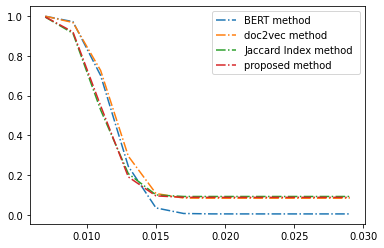

In [171]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# create data


y = disp_result_bert
x = np.arange(0.007, 0.03, 0.002)
plt.plot(x, y, label = "BERT method ", linestyle="-." )

y = disp_result_doc2vec
plt.plot(x, y, label = "doc2vec method ", linestyle="-." )

y = disp_result_ji
plt.plot(x, y, label = "Jaccard Index method ", linestyle="-." )

y = disp_result_proposed
plt.plot(x, y, label = "proposed method ", linestyle="-." )

plt.legend()
plt.show()

In [108]:
def NS_fun(story_embed_):
  total = list()
  for x in story_embed_:
    res = list()
    for d_1, d_2 in zip(x[:-1], x[1:]):
      tmp = np.sqrt(np.sum(np.square(d_1-d_2)))
      res.append(tmp)
    total.append(sum(res)/len(res))

  return total

In [111]:
from sklearn.metrics.pairwise import cosine_similarity
def NS_cos(story_embed_):
  total = list()
  for x in story_embed_:
    res = list()
    for d_1, d_2 in zip(x[:-1], x[1:]):
      tmp = cosine_similarity([d_1],[d_2])[0][0]
      res.append(tmp)
    total.append(sum(res)/len(res))

  return total

In [116]:
# print(NS(full_story_NYT_proposed_embedding))
def NS(list_stories):
  res_NS = list()
  for chapter in list_stories: 
    new_vec = list()
    for x,y in zip(chapter[:-1], chapter[1:]):
      new_vec.append(np.sqrt(np.sum(np.square(x-y))))
    mean = np.mean(new_vec)
    sd = np.std(new_vec)
    avg = sum(new_vec) /len(new_vec)
    # tmp = (np.pi*sd) * np.exp(-0.5*((new_vec-mean)/sd)**2)
    tmp =  np.exp(-0.5*((new_vec-mean)/sd)**2)
    res_NS.append(sum(tmp)/len(tmp))
  return res_NS

2.5591908945487094


In [109]:
bert_NS = NS_fun(full_story_NYT_bert_embedding)
doc2vec_NS = NS_fun(full_story_NYT_doc2vec_embedding)
ji_NS = NS_fun(full_story_NYT_JI_embedding)
proposed_NS = NS_fun(full_story_NYT_proposed_embedding)

print('NS value for bert model is :', sum(bert_NS) / len(bert_NS))
print('NS value for doc2vec model is :',sum(doc2vec_NS) / len(doc2vec_NS))
print('NS value for Jaccard Index model is :',sum(ji_NS) / len(ji_NS))
print('NS value for proposed method is :',sum(proposed_NS) / len(proposed_NS))

NS value for bert model is : 7.348722622761187
NS value for doc2vec model is : 8.609997943976511
NS value for Jaccard Index model is : 7.622973631576216
NS value for proposed method is : 7.329193348195935


In [110]:
bert_NS = NS(full_story_NYT_bert_embedding)
doc2vec_NS = NS(full_story_NYT_doc2vec_embedding)
ji_NS = NS(full_story_NYT_JI_embedding)
proposed_NS = NS(full_story_NYT_proposed_embedding)

print('NS value for bert model is :', sum(bert_NS) / len(bert_NS))
print('NS value for doc2vec model is :',sum(doc2vec_NS) / len(doc2vec_NS))
print('NS value for Jaccard Index model is :',sum(ji_NS) / len(ji_NS))
print('NS value for proposed method is :',sum(proposed_NS) / len(proposed_NS))

NS value for bert model is : 2.9361508515672967
NS value for doc2vec model is : 2.4971971115487204
NS value for Jaccard Index model is : 2.9207725249354106
NS value for proposed method is : 2.461102678760269


In [118]:
bert_NS =np.array(NS_cos(full_story_NYT_bert_embedding)) /np.array(NS(full_story_NYT_bert_embedding))
doc2vec_NS = np.array(NS_cos(full_story_NYT_doc2vec_embedding))/np.array(NS(full_story_NYT_doc2vec_embedding))
ji_NS = np.array(NS_cos(full_story_NYT_JI_embedding))/np.array(NS(full_story_NYT_JI_embedding))
proposed_NS = np.array(NS_cos(full_story_NYT_proposed_embedding))/np.array(NS(full_story_NYT_proposed_embedding))

print('NS value for bert model is :', sum(bert_NS) / (len(bert_NS)*np.sqrt(2)))
print('NS value for doc2vec model is :',sum(doc2vec_NS) / (len(doc2vec_NS)*np.sqrt(2)))
print('NS value for Jaccard Index model is :',sum(ji_NS) / (len(ji_NS)*np.sqrt(2)))
print('NS value for proposed method is :',sum(proposed_NS) / (len(proposed_NS)*np.sqrt(2)))

NS value for bert model is : 0.8538618905888516
NS value for doc2vec model is : 0.8539231730227377
NS value for Jaccard Index model is : 0.8862149567192268
NS value for proposed method is : 0.9107227477441235
